In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob

import IPython
import IPython.display as ipd

import librosa
import librosa.display

### How to read the Audio Files
With using the package glob we can list out all files in the folders.

Make a list of all the wav files in the dataset and store them in a variable

In [6]:
audio_files = glob("F:/Python scripts/Projects/Music Genre/Data/genres_original/*/*.wav")

In [17]:
len(audio_files)

1000

With using the IPhytons display module we can display the audio files. We get a player in the notebook where we can listen to the audio file. Note that we didn't actually didn't read in the file and can't manipulate it yet.

In [15]:
ipd.Audio(audio_files[25])

### How to load the Audio Files
Here we use librosa and its load() function to read the audio files. We save the ouutputs as 'y' and sr':

y: raw data of the audio file (numpy array)
sr: integer value of the sample rate

In [22]:
y, sr = librosa.load(audio_files[0])

In [23]:
print('Raw data of audio file: ', y)
print('Shape of raw data: ', y.shape)
print('Sample rate: ', sr)

Raw data of audio file:  [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
Shape of raw data:  (661794,)
Sample rate:  22050


### Plotting the audio files

<AxesSubplot:title={'center':'Raw Audio Sample'}>

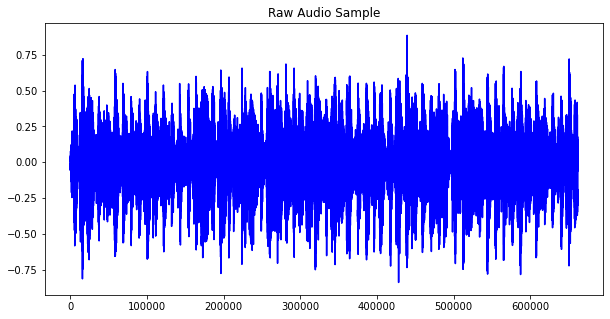

In [25]:
pd.Series(y).plot(figsize = (10, 5), title = 'Raw Audio Sample', color = 'Blue')

We want to take it to the next level by looking at the different frequencies by how powerful they are.
We do this with applying a Fourier transform to the audio data. That allows us to extract out which frequencies are sounding at different parts in the audio file. We use the stft() function (Short-time Fourier Transform).
Than we apply the amplitude to db function to the output of STFT, which is a commonly used transform for audio data to convert amplitude values to decibel (db).
With this we get data which we can feed to normal ML models.

In [27]:
## Checking the frequency of audios - Fourier transform (Short-Term Fourier Transform)
## Convert amplpitude values to decibels

D = librosa.stft(y)

S_db = librosa.amplitude_to_db(np.abs(D), ref = np.max)

print("New shape of transformed data: ", S_db.shape)

New shape of transformed data:  (1025, 1293)


### Plotting audio files as Spectogram

A spectrogram is a visual representation of the spectrum of frequencies in a sound or other signal as it varies with time. The resulting plot is a two-dimensional graph, with frequency on the vertical axis and time on the horizontal axis. Spectrograms are often used in the analysis and manipulation of audio signals, particularly in the fields of music, speech, and acoustics.

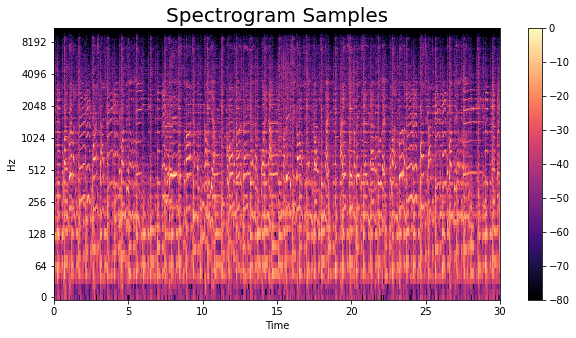

In [32]:
#Spectogram gives the frequexy change in the audio file w.r.t to time which helps in analyzing the audio files.

fig, ax = plt.subplots(figsize = (10, 5))
img = librosa.display.specshow(S_db, x_axis = 'time', y_axis = 'log', ax = ax)
ax.set_title("Spectrogram Samples", fontsize = 20)
fig.colorbar(img, ax = ax)

### Melodic Spectrogram

A Mel spectrogram is a type of spectrogram that represents the spectral content of a sound or signal on a scale that is based on the perceived pitch of the different frequencies. The Mel scale is a logarithmic scale that maps frequency to pitch in a way that is more closely related to how the human auditory system perceives pitch.

In [33]:
#Melodic spectrogram without stft()
S = librosa.feature.melspectrogram(y, sr = sr, n_mels = 128 * 2)
print(S.shape)

(256, 1293)


C:\Users\91767\AppData\Local\Temp/ipykernel_25676/1671159096.py:2: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr = sr, n_mels = 128 * 2)


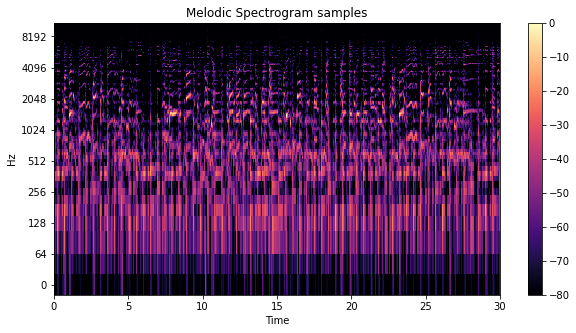

In [36]:
#Melodic spectrogram with decibels
S_db_mel = librosa.amplitude_to_db(S, ref = np.max)

fig, ax = plt.subplots(figsize = (10, 5))
img = librosa.display.specshow(S_db_mel, x_axis = 'time', y_axis = 'log', ax = ax)
ax.set_title("Melodic Spectrogram samples")
plt.colorbar(img, ax = ax)

## EDA on the dataset

In [37]:
df = pd.read_csv(r"F:\Python scripts\Projects\Music Genre\Data\features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

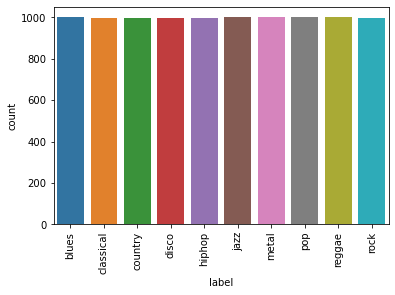

In [41]:
sns.countplot(x = df.label)
plt.xticks(rotation = 90);

In [44]:
#Extracting labels from the dataset
labels = df.label
labels.to_frame()

,label
0,blues
1,blues
2,blues
3,blues
4,blues
...,...
9985,rock
9986,rock
9987,rock
9988,rock


In [45]:
#Dropping filename as we will not be using it and also dropped label as we have already seperated in from the data
df = df.drop(['filename', 'label'], axis = 1)
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [46]:
#Using StandardScaler for the data and Labelencoder for label
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
encoder = LabelEncoder()

In [48]:
x = np.array(df, dtype = float)
x = scaler.fit_transform(df)
y = encoder.fit_transform(labels)
x.shape, y.shape

((9990, 58), (9990,))

In [49]:
#splitting the data (x) into training and testing sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.33)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((6693, 58), (6693,), (3297, 58), (3297,))

### Working with different models

In [52]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
GNB = GaussianNB()
NNB = BernoulliNB()
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
XGB = XGBClassifier()

In [54]:
algos = [GNB, NNB, KNC, DTC, RFC, XGB]
algo_names = ['GaussianNB', 'BernoulliNB', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']

accuracy = []
for algo in algos:
    algo.fit(xtrain, ytrain)
    preds = algo.predict(xtest)
    accuracy.append(accuracy_score(ytest, preds))

print(accuracy)

C:\Users\91767\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:53:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.5171367910221414, 0.47558386411889597, 0.8671519563239308, 0.6599939338792842, 0.8610858356081286, 0.8926296633303002]


In [55]:
results = pd.DataFrame(accuracy, columns = ['Accuracy'])
results['Algorithm'] = algo_names
results.sort_values('Accuracy', ascending = False)

,Accuracy,Algorithm
5,0.892630,XGBClassifier
2,0.867152,KNeighborsClassifier
4,0.861086,RandomForestClassifier
3,0.659994,DecisionTreeClassifier
0,0.517137,GaussianNB
1,0.475584,BernoulliNB


### Using Deep Learning

In [56]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [58]:
model = Sequential([
    keras.layers.Dense(1024, activation = 'relu', input_shape = (xtrain.shape[1], )),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax'),
])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              60416     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [60]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [61]:
history = model.fit(xtrain, ytrain, validation_data = (xtest, ytest), epochs = 300, batch_size = 128)

Epoch 1/300
53/53 [==============================] - 1s 16ms/step - loss: 1.8533 - accuracy: 0.3109 - val_loss: 1.3710 - val_accuracy: 0.5071
Epoch 2/300
53/53 [==============================] - 1s 12ms/step - loss: 1.3780 - accuracy: 0.5162 - val_loss: 1.0376 - val_accuracy: 0.6527
Epoch 3/300
53/53 [==============================] - 1s 13ms/step - loss: 1.1061 - accuracy: 0.6289 - val_loss: 0.8961 - val_accuracy: 0.7122
Epoch 4/300
53/53 [==============================] - 1s 13ms/step - loss: 0.9342 - accuracy: 0.6997 - val_loss: 0.7891 - val_accuracy: 0.7422
Epoch 5/300
53/53 [==============================] - 1s 13ms/step - loss: 0.7841 - accuracy: 0.7436 - val_loss: 0.6948 - val_accuracy: 0.7725
Epoch 6/300
53/53 [==============================] - 1s 13ms/step - loss: 0.7014 - accuracy: 0.7716 - val_loss: 0.6238 - val_accuracy: 0.7965
Epoch 7/300
53/53 [==============================] - 1s 13ms/step - loss: 0.5949 - accuracy: 0.8134 - val_loss: 0.5976 - val_accuracy: 0.8120
Epoch 

53/53 [==============================] - 1s 17ms/step - loss: 0.0153 - accuracy: 0.9955 - val_loss: 0.4829 - val_accuracy: 0.9208
Epoch 116/300
53/53 [==============================] - 1s 18ms/step - loss: 0.0172 - accuracy: 0.9951 - val_loss: 0.5549 - val_accuracy: 0.9166
Epoch 117/300
53/53 [==============================] - 1s 24ms/step - loss: 0.0255 - accuracy: 0.9934 - val_loss: 0.5426 - val_accuracy: 0.9190
Epoch 118/300
53/53 [==============================] - 1s 23ms/step - loss: 0.0438 - accuracy: 0.9886 - val_loss: 0.5352 - val_accuracy: 0.9099
Epoch 119/300
53/53 [==============================] - 1s 25ms/step - loss: 0.0348 - accuracy: 0.9919 - val_loss: 0.5158 - val_accuracy: 0.9166
Epoch 120/300
53/53 [==============================] - 2s 31ms/step - loss: 0.0455 - accuracy: 0.9888 - val_loss: 0.4719 - val_accuracy: 0.9126
Epoch 121/300
53/53 [==============================] - 2s 30ms/step - loss: 0.0363 - accuracy: 0.9900 - val_loss: 0.4751 - val_accuracy: 0.9172
Epoch 

Epoch 172/300
53/53 [==============================] - 1s 13ms/step - loss: 0.0192 - accuracy: 0.9960 - val_loss: 0.6410 - val_accuracy: 0.9142
Epoch 173/300
53/53 [==============================] - 1s 14ms/step - loss: 0.0245 - accuracy: 0.9949 - val_loss: 0.6212 - val_accuracy: 0.9120
Epoch 174/300
53/53 [==============================] - 1s 18ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.6407 - val_accuracy: 0.9096
Epoch 175/300
53/53 [==============================] - 1s 15ms/step - loss: 0.0305 - accuracy: 0.9930 - val_loss: 0.6910 - val_accuracy: 0.9029
Epoch 176/300
53/53 [==============================] - 1s 13ms/step - loss: 0.0310 - accuracy: 0.9922 - val_loss: 0.6814 - val_accuracy: 0.9069
Epoch 177/300
53/53 [==============================] - 1s 12ms/step - loss: 0.0287 - accuracy: 0.9925 - val_loss: 0.5913 - val_accuracy: 0.9178
Epoch 178/300
53/53 [==============================] - 1s 14ms/step - loss: 0.0141 - accuracy: 0.9960 - val_loss: 0.5099 - val_accuracy:

Epoch 229/300
53/53 [==============================] - 1s 14ms/step - loss: 0.0535 - accuracy: 0.9872 - val_loss: 0.4365 - val_accuracy: 0.9221
Epoch 230/300
53/53 [==============================] - 1s 14ms/step - loss: 0.0225 - accuracy: 0.9937 - val_loss: 0.4760 - val_accuracy: 0.9293
Epoch 231/300
53/53 [==============================] - 1s 15ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.5278 - val_accuracy: 0.9202
Epoch 232/300
53/53 [==============================] - 1s 15ms/step - loss: 0.0221 - accuracy: 0.9946 - val_loss: 0.5184 - val_accuracy: 0.9214
Epoch 233/300
53/53 [==============================] - 1s 15ms/step - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.5030 - val_accuracy: 0.9251
Epoch 234/300
53/53 [==============================] - 1s 18ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.5393 - val_accuracy: 0.9227
Epoch 235/300
53/53 [==============================] - 1s 17ms/step - loss: 0.0114 - accuracy: 0.9967 - val_loss: 0.5459 - val_accuracy:

Epoch 286/300
53/53 [==============================] - 1s 12ms/step - loss: 0.0084 - accuracy: 0.9970 - val_loss: 0.6065 - val_accuracy: 0.9230
Epoch 287/300
53/53 [==============================] - 1s 12ms/step - loss: 0.0187 - accuracy: 0.9954 - val_loss: 0.5741 - val_accuracy: 0.9221
Epoch 288/300
53/53 [==============================] - 1s 13ms/step - loss: 0.0108 - accuracy: 0.9966 - val_loss: 0.6321 - val_accuracy: 0.9166
Epoch 289/300
53/53 [==============================] - 1s 12ms/step - loss: 0.0170 - accuracy: 0.9951 - val_loss: 0.6478 - val_accuracy: 0.9148
Epoch 290/300
53/53 [==============================] - 1s 12ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.6572 - val_accuracy: 0.9211
Epoch 291/300
53/53 [==============================] - 1s 12ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.6110 - val_accuracy: 0.9208
Epoch 292/300
53/53 [==============================] - 1s 11ms/step - loss: 0.0231 - accuracy: 0.9949 - val_loss: 0.6178 - val_accuracy:

In [62]:
results = model.evaluate(xtest, ytest, batch_size = 128)
results

26/26 [==============================] - 0s 4ms/step - loss: 0.5670 - accuracy: 0.9233


[0.5670172572135925, 0.9232635498046875]

In [63]:
print('val_loss: ', results[0])
print('Accuray: ', results[1])

val_loss:  0.5670172572135925
Accuray:  0.9232635498046875


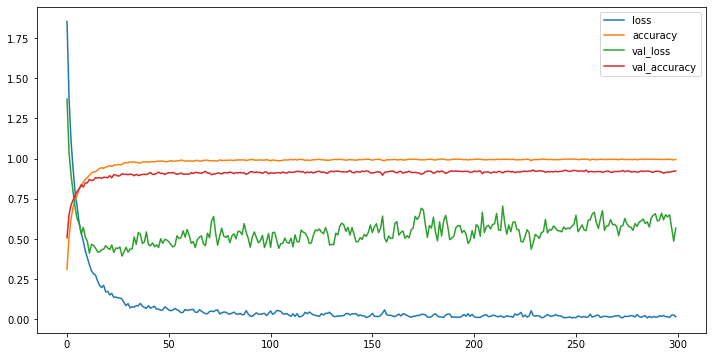

In [65]:
pd.DataFrame(history.history).plot(figsize = (12, 6))
plt.show()